# Spam Filtering Results

The following notebook has been written as part of the project for the L101 module. It aims at ploting different graphs to visualise and compare results of models under study.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load results for Memory-Based models

In [2]:
df_timbl = pd.read_csv("timbl_results.csv", sep=";")
df_timbl.head()

,model,nb_words,k,weights,distance,precision,recall,f1_score,auc
0,timbl,50,1,gain ratio,equal,0.72727,0.77333,0.749593,0.74167
1,timbl,50,2,gain ratio,equal,0.70948,0.77333,0.740030,0.72833
2,timbl,50,10,gain ratio,equal,0.68598,0.75000,0.716563,0.70333
3,timbl,50,1,no weights,equal,0.72555,0.76667,0.745543,0.73833
4,timbl,50,2,no weights,equal,0.68358,0.76333,0.721257,0.70500


Load results for Naive Bayes models

In [3]:
df_nb = pd.read_csv("nb_results.csv", sep=",")
df_nb.head()

,model_name,nb_words,precision,recall,f1_score,auc
0,Multinomial NB Boolean,700,0.864078,0.890000,0.876847,0.874766
1,Multivariate Bernoulli NB,700,0.802239,0.716667,0.757042,0.769705
2,Gaussian NB Boolean,700,0.890625,0.760000,0.820144,0.833177
3,Multinomial NB Boolean,650,0.859425,0.896667,0.877651,0.874755
4,Multivariate Bernoulli NB,650,0.795539,0.713333,0.752197,0.764693


Clean data (some Naive Bayes models raise errors with less than 200 attributes and have default values instead)

In [4]:
df_nb.drop(index=df_nb[(df_nb.model_name == "Multinomial NB TF") & (df_nb.nb_words<200)].index, inplace=True)
df_nb.drop(index=df_nb[(df_nb.model_name == "Multinomial NB TF Test") & (df_nb.nb_words<200)].index, inplace=True)

In [5]:
df_nb.drop(index=df_nb[(df_nb.model_name == "Gaussian NB Normalized") & (df_nb.nb_words<200)].index, inplace=True)
df_nb.drop(index=df_nb[(df_nb.model_name == "Gaussian NB Normalized Test") & (df_nb.nb_words<200)].index, inplace=True)

In [6]:
df_timbl = df_timbl.rename(columns={'weights':'Weights', 'distance':'Distance'})
df_timbl.loc[df_timbl.Weights == 'gain ratio','Weights'] = "Gain Ratio"
df_timbl.loc[df_timbl.Weights == "no weights",'Weights'] = "Equal Weights"
df_timbl.loc[df_timbl.Distance == "equal",'Distance'] = "Equal Distance"
df_timbl.loc[df_timbl.Distance == "inverse distance",'Distance'] = "Inverse Distance"
df_timbl.loc[df_timbl.Distance == "inverse linear",'Distance'] = "Inverse Linear"
df_timbl.loc[df_timbl.Distance == "exponential decay",'Distance'] = "Exponential Decay"

In [7]:
df_nb.loc[df_nb.model_name == "Gaussian NB Normalized",'model_name'] = "Gaussian NB norm. TF"
df_nb.loc[df_nb.model_name == "Gaussian NB Normalized Test",'model_name'] = "Gaussian NB norm. TF Test"

## Results for Memory-Based models on the adaptation set

### Feature-weighting scheme

[]

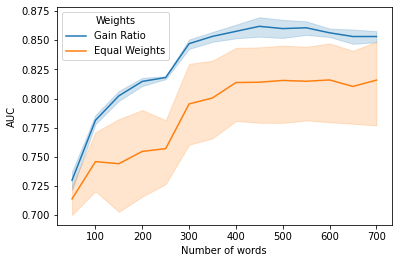

In [8]:
plt.figure()
sns.lineplot(data=df_timbl[df_timbl.model != 'timbl test'], x='nb_words', y='auc', hue='Weights')
plt.xlabel("Number of words")
plt.ylabel("AUC")
plt.plot()

[]

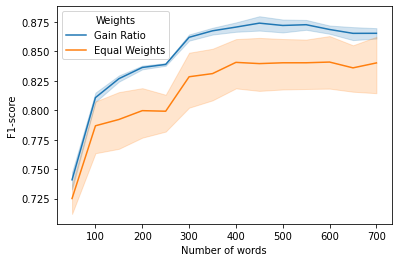

In [9]:
plt.figure()
sns.lineplot(data=df_timbl[df_timbl.model != 'timbl test'], x='nb_words', y='f1_score', hue='Weights')
plt.xlabel("Number of words")
plt.ylabel("F1-score")
plt.plot()

### Neighborhood size

[]

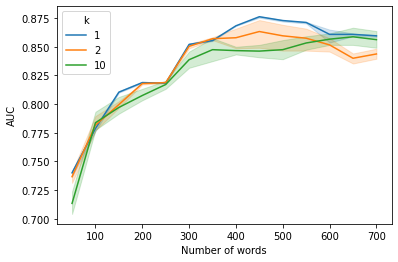

In [10]:
plt.figure()
sns.lineplot(data=df_timbl[(df_timbl.model != 'timbl test') & (df_timbl.Weights == 'Gain Ratio')], x='nb_words', y='auc', hue='k', palette='tab10')
plt.xlabel("Number of words")
plt.ylabel("AUC")
plt.plot()

[]

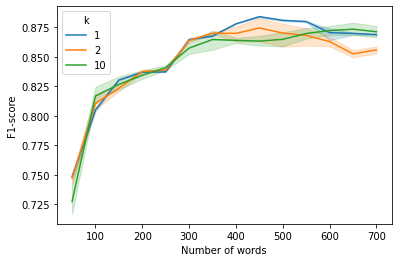

In [11]:
plt.figure()
sns.lineplot(data=df_timbl[(df_timbl.model != 'timbl test') & (df_timbl.Weights == 'Gain Ratio')], x='nb_words', y='f1_score', hue='k', palette='tab10')
plt.xlabel("Number of words")
plt.ylabel("F1-score")
plt.plot()

### Distance-weighting scheme

[]

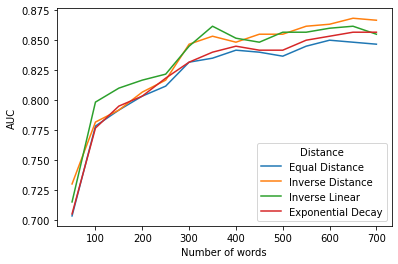

In [12]:
plt.figure()
sns.lineplot(data=df_timbl[(df_timbl.model != 'timbl test') & (df_timbl.k == 10) & (df_timbl.Weights == 'Gain Ratio')], x='nb_words', y='auc', hue='Distance')
plt.xlabel("Number of words")
plt.ylabel("AUC")
plt.plot()

[]

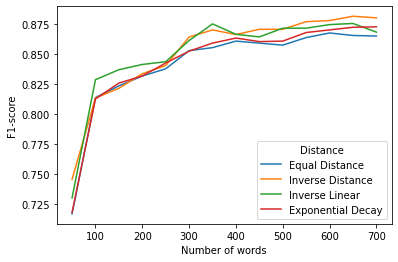

In [13]:
plt.figure()
sns.lineplot(data=df_timbl[(df_timbl.model != 'timbl test') & (df_timbl.k == 10) & (df_timbl.Weights == 'Gain Ratio')], x='nb_words', y='f1_score', hue='Distance')
plt.xlabel("Number of words")
plt.ylabel("F1-score")
plt.plot()

## Results for NB models on the adaptation set

[]

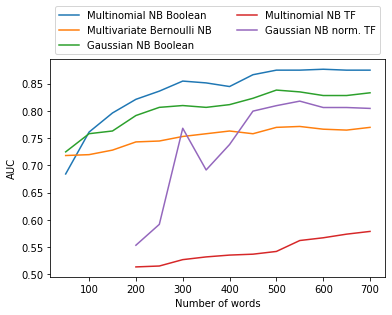

In [14]:
plt.figure()
sns.lineplot(data=df_nb[(~df_nb['model_name'].str.endswith('Test'))], x='nb_words', y='auc', hue='model_name')
plt.xlabel("Number of words")
plt.ylabel("AUC")
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=2)
plt.plot()

[]

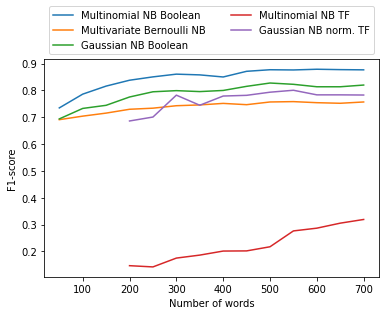

In [15]:
plt.figure()
sns.lineplot(data=df_nb[(~df_nb['model_name'].str.endswith('Test'))], x='nb_words', y='f1_score', hue='model_name')
plt.xlabel("Number of words")
plt.ylabel("F1-score")
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=2)
plt.plot()

## Comparison of Memory-Based models with NB models on the adaptation set

[]

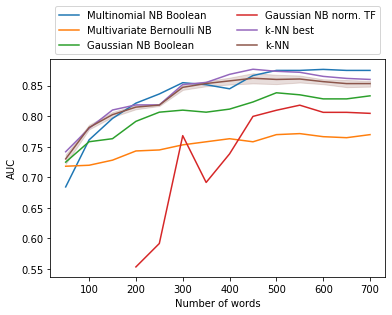

In [16]:
plt.figure()
sns.lineplot(data=df_nb[df_nb.model_name == "Multinomial NB Boolean"], x='nb_words', y='auc', label = "Multinomial NB Boolean")
sns.lineplot(data=df_nb[df_nb.model_name == "Multivariate Bernoulli NB"], x='nb_words', y='auc', label = "Multivariate Bernoulli NB")
sns.lineplot(data=df_nb[df_nb.model_name == "Gaussian NB Boolean"], x='nb_words', y='auc', label = "Gaussian NB Boolean")
sns.lineplot(data=df_nb[df_nb.model_name == "Gaussian NB norm. TF"], x='nb_words', y='auc', label = "Gaussian NB norm. TF")
sns.lineplot(data=df_timbl[(df_timbl.model != 'timbl test') & (df_timbl.Distance == 'Inverse Distance') & (df_timbl.Weights == 'Gain Ratio') & (df_timbl.k == 1)], x='nb_words', y='auc', label = "k-NN best")
sns.lineplot(data=df_timbl[(df_timbl.model != 'timbl test') & (df_timbl.Weights == 'Gain Ratio')], x='nb_words', y='auc', label = "k-NN")
plt.xlabel("Number of words")
plt.ylabel("AUC")
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=2)
plt.plot()

[]

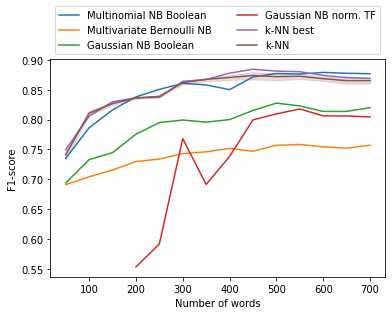

In [17]:
plt.figure()
sns.lineplot(data=df_nb[df_nb.model_name == "Multinomial NB Boolean"], x='nb_words', y='f1_score', label = "Multinomial NB Boolean")
sns.lineplot(data=df_nb[df_nb.model_name == "Multivariate Bernoulli NB"], x='nb_words', y='f1_score', label = "Multivariate Bernoulli NB")
sns.lineplot(data=df_nb[df_nb.model_name == "Gaussian NB Boolean"], x='nb_words', y='f1_score', label = "Gaussian NB Boolean")
sns.lineplot(data=df_nb[df_nb.model_name == "Gaussian NB norm. TF"], x='nb_words', y='auc', label = "Gaussian NB norm. TF")
sns.lineplot(data=df_timbl[(df_timbl.model != 'timbl test') & (df_timbl.Distance == 'Inverse Distance') & (df_timbl.Weights == 'Gain Ratio') & (df_timbl.k == 1)], x='nb_words', y='f1_score', label = "k-NN best")
sns.lineplot(data=df_timbl[(df_timbl.model != 'timbl test') & (df_timbl.Weights == 'Gain Ratio')], x='nb_words', y='f1_score', label = "k-NN")
plt.xlabel("Number of words")
plt.ylabel("F1-score")
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=2)
plt.plot()

## Comparison of Memory-Based models with NB models on the test set

[]

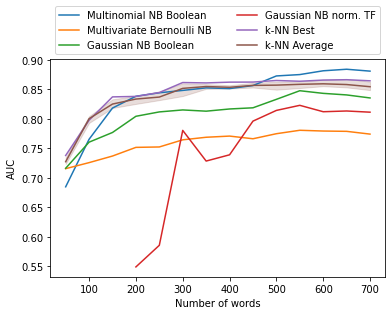

In [18]:
plt.figure()
sns.lineplot(data=df_nb[df_nb.model_name == "Multinomial NB Boolean Test"], x='nb_words', y='auc', label = "Multinomial NB Boolean")
sns.lineplot(data=df_nb[df_nb.model_name == "Multivariate Bernoulli NB Test"], x='nb_words', y='auc', label = "Multivariate Bernoulli NB")
sns.lineplot(data=df_nb[df_nb.model_name == "Gaussian NB Boolean Test"], x='nb_words', y='auc', label = "Gaussian NB Boolean")
sns.lineplot(data=df_nb[df_nb.model_name == "Gaussian NB norm. TF Test"], x='nb_words', y='auc', label = "Gaussian NB norm. TF")
sns.lineplot(data=df_timbl[(df_timbl.model == 'timbl test') & (df_timbl.Distance == 'Inverse Distance') & (df_timbl.Weights == 'Gain Ratio') & (df_timbl.k == 1)], x='nb_words', y='auc', label = "k-NN Best")
sns.lineplot(data=df_timbl[(df_timbl.model == 'timbl test') & (df_timbl.Distance == 'Inverse Distance') & (df_timbl.Weights == 'Gain Ratio') & (df_timbl.k != 1)], x='nb_words', y='auc', label = "k-NN Average")
plt.xlabel("Number of words")
plt.ylabel("AUC")
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=2)
plt.plot()

[]

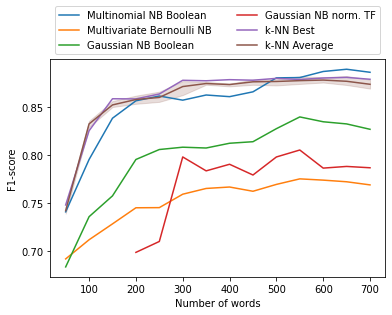

In [19]:
plt.figure()
sns.lineplot(data=df_nb[df_nb.model_name == "Multinomial NB Boolean Test"], x='nb_words', y='f1_score', label = "Multinomial NB Boolean")
sns.lineplot(data=df_nb[df_nb.model_name == "Multivariate Bernoulli NB Test"], x='nb_words', y='f1_score', label = "Multivariate Bernoulli NB")
sns.lineplot(data=df_nb[df_nb.model_name == "Gaussian NB Boolean Test"], x='nb_words', y='f1_score', label = "Gaussian NB Boolean")
sns.lineplot(data=df_nb[df_nb.model_name == "Gaussian NB norm. TF Test"], x='nb_words', y='f1_score', label = "Gaussian NB norm. TF")
sns.lineplot(data=df_timbl[(df_timbl.model == 'timbl test') & (df_timbl.Distance == 'Inverse Distance') & (df_timbl.Weights == 'Gain Ratio') & (df_timbl.k == 1)], x='nb_words', y='f1_score', label = "k-NN Best")
sns.lineplot(data=df_timbl[(df_timbl.model == 'timbl test') & (df_timbl.Distance == 'Inverse Distance') & (df_timbl.Weights == 'Gain Ratio') & (df_timbl.k != 1)], x='nb_words', y='f1_score', label = "k-NN Average")
plt.xlabel("Number of words")
plt.ylabel("F1-score")
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=2)
plt.plot()